Logistic regression implementation and bias-variance trade-off

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# display matplotlib graph's within notebook
%matplotlib inline 
import numpy as np

np.set_printoptions(precision=3,suppress=True)

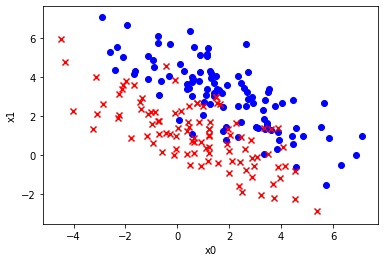

[[ 1.     0.553  1.111]
 [ 1.     3.341  1.86 ]
 [ 1.     1.506  4.052]
 [ 1.    -0.93   4.892]
 [ 1.     3.522  3.425]
 [ 1.    -1.686  4.196]
 [ 1.    -1.93   6.69 ]
 [ 1.     1.707  3.189]
 [ 1.     3.457  1.652]
 [ 1.     5.525  1.465]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [2]:
num_iters = 1000
alpha = 0.2

# class 0:
# covariance matrix and mean

cov0 = np.array([[5,-3],[-3,3]])

mean0 = np.array([2.,3])

# number of data points
m0 = 100
# generate m0 gaussian distributed data points with
# mean0 and cov0.
r0 = np.random.multivariate_normal(mean0, cov0, m0)

# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
m1 = 100
r1 = np.random.multivariate_normal(mean1, cov1, m1)

plt.scatter(r0[...,0], r0[...,1], c='b', marker='o', label="Klasse 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='x', label="Klasse 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

X = np.concatenate((r0,r1))
X = np.append(np.ones((len(X),1)), X, axis=1)
y = np.zeros(len(r0)+len(r1))
y[:len(r0),] = 1
print(X[:10])
print(y[:10])

m = len(y)
theta = np.array([1.1, 2.0, -.9]) 

Text(0, 0.5, '$g(x)$')

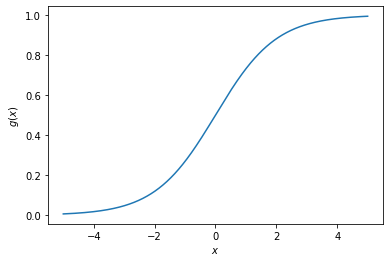

In [3]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# test on a few values
xx = np.linspace(-5, 5, 1000)

# plot sigmoid function vs. x
plt.plot(xx, sigmoid(xx))
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')

In [4]:
# Hypothesis
def logistic_hypothesis(theta):
    def h(X):
        y = sigmoid(np.dot(X, theta))
        return y
    return h


# test
theta_test_0 = np.array([1.1, 2.0, -.9]) 
h_test_0 = logistic_hypothesis(theta_test_0)
X_test_0 = X.copy()


In [5]:
# Loss function
def cross_entropy_loss(h, X, y):
    def loss(theta):
        h = logistic_hypothesis(theta)
        temp = np.dot(y, np.log(h(X))) + np.dot((1-y), np.log(1- h(X)))
        return temp
    return loss


# test
theta_test_1 = np.array([1.1, 2.0, -.9]) 
h_test_1 = logistic_hypothesis(theta_test_1)
X_test_1 = X.copy()
y_test_1 = y.copy()

loss_test_1 = cross_entropy_loss(h_test_1, X_test_1, y_test_1)
print(loss_test_1(theta_test_1))

-465.2519099263477


In [6]:
# Cost function
def cost_function(X, y, h, theta):
    loss = cross_entropy_loss(h, X, y)
    cost = -1*(1/m) * loss(theta)
    return cost

# test
theta_test_2 = np.array([1.1, 2.0, -.9]) 
h_test_2 = logistic_hypothesis(theta_test_2)
X_test_2 = X.copy()
y_test_2 = y.copy()

cost_test_2 = cost_function(X_test_2, y_test_2, h_test_2, theta_test_2)
print(cost_test_2)

2.3262595496317386


In [7]:
# Update weights
def compute_new_theta(X, y, theta, alpha, h):
    theta = theta - np.dot(np.transpose(X), h(X) - y)*(alpha/m)
    return theta

# test
theta_test_3 = np.array([1.1, 2.0, -.9]) 
h_test_3 = logistic_hypothesis(theta_test_3)
X_test_3 = X.copy()
y_test_3 = y.copy()

theta_test_3 = compute_new_theta(X_test_3, y_test_3, theta_test_3, alpha, h_test_3)
print(theta_test_3)

[ 1.076  1.871 -0.749]


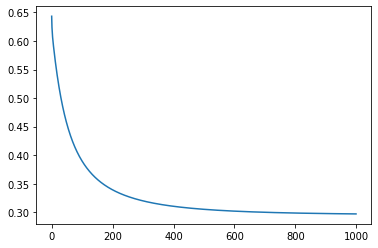

In [8]:
# Gradient descent
def gradient_descent(alpha, theta, X, y):
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        h = logistic_hypothesis(theta)
        theta = compute_new_theta(X, y, theta, alpha, h)
        for j in range(m):
            j = cost_function(X, y, h, theta)
            J_history[i] = j
    return J_history, theta

# test
theta_test_4 = np.array([0, 0, 0]) 
h_test_4 = logistic_hypothesis(theta_test_4)
X_test_4 = X.copy()
y_test_4 = y.copy()

J_history, theta_result = gradient_descent(alpha, theta_test_4, X_test_4, y_test_4)
plt.plot(J_history)

In [9]:
# test Y
print("Y_before till 10: ", y)
h = logistic_hypothesis(theta_result)
y_after = h(X)
print("Y_after_gradient_descent till 10: ", y_after[:10])

Y_before till 10:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Y_after_gradient_descent till 10:  [0.079 0.886 0.972 0.89  0.992 0.511 0.98  0.913 0.863 0.981]


NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

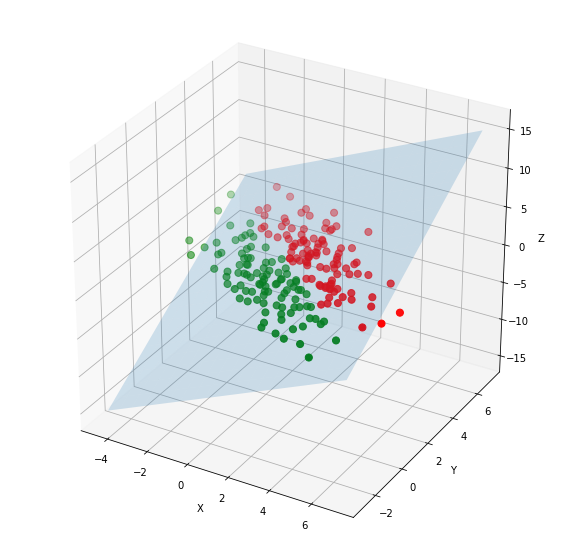

In [10]:
# Plot
def plot3D(X, y, theta_result):
    
    # data
    data = np.c_[X[:, 1], X[:, 2], y]
    
    # negative/positive points
    pos = y >= 0.5
    neg = y <= 0.5
    
    X_0_pos = X[pos,1]
    X_0_pos = X_0_pos.reshape(len(X_0_pos), 1)
    X_1_pos = X[pos,2]
    X_1_pos = X_1_pos.reshape(len(X_1_pos), 1)
    Y_pos = y[pos]
    Y_pos = Y_pos.reshape(len(Y_pos), 1)
    
    X_0_neg = X[neg,1]
    X_0_neg = X_0_neg.reshape(len(X_0_neg), 1)
    X_1_neg = X[neg,2]
    X_1_neg = X_1_neg.reshape(len(X_1_neg), 1)
    Y_neg = y[neg]
    Y_neg = Y_neg.reshape(len(Y_neg), 1)
    
    # plot plane
    mn = np.min(data, axis=0)
    mx = np.max(data, axis=0)
    X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
    Z = theta_result[1]*X + theta_result[2]*Y + theta_result[0]  
    fig1 =  plt.figure(figsize=(10, 10))
    ax = fig1.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
    
    # plot points
    ax.scatter(X_0_neg, X_1_neg, Y_neg, c='g', s=50)
    ax.scatter(X_0_pos, X_1_pos, Y_pos, c='r', s=50)
    
    # plot finish
    plt.xlabel('X')
    plt.ylabel('Y')
    ax.set_zlabel('Z')
    ax.axis('equal')
    ax.axis('tight')
    
    # rotate
    for angle in range(0, 360):
        ax.view_init(25, angle)

# test
X_test = X.copy()
y_after_test = y_after.copy()
theta_result_test = theta_result.copy()
plot3D(X_test, y_after, theta_result_test)

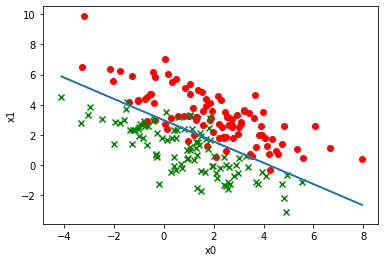

In [11]:



# artifical dataset for logistic regression

import numpy as np
import matplotlib.pyplot as plt

# class 0:
# covariance matrix and mean
theta = theta_result
cov0 = np.array([[5,-3],[-3,3]])

mean0 = np.array([2.,3])

# number of data points
m0 = 100
# generate m0 gaussian distributed data points with
# mean0 and cov0.
r0 = np.random.multivariate_normal(mean0, cov0, m0)

# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
m1 = 100
r1 = np.random.multivariate_normal(mean1, cov1, m1)

plt.scatter(r0[...,0], r0[...,1], c='r', marker='o', label="Klasse 0")
plt.scatter(r1[...,0], r1[...,1], c='g', marker='x', label="Klasse 1")
plt.xlabel("x0")
plt.ylabel("x1")


X = np.concatenate((r0,r1))

oneVector = np.full((len(X), 1), 1.)
X = np.hstack([oneVector, X])

y = np.zeros(len(r0)+len(r1))
y[:len(r0),] = 1

x2 = - (theta[0] + theta[1]*X[:,1]) /theta[2]

plt.plot(X[:,1],x2)
plt.show()



In [ ]:
# Plotting 3d mit Plotly

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Import plotly package
import plotly
import plotly.graph_objs as go

# Check ploltly version
plotly.__version__

# To communicate with Plotly's server, sign in with credentials file
import plotly.plotly as py

def plotly3D(X, y, theta):
    
    data = np.c_[X[:, 1], X[:, 2], y]
    
    pos = y >= 0.5
    neg = y <= 0.5 
    
    # plot points and fitted surface using Plotly
    X_0_pos = X[pos,1]
    X_0_pos = X_0_pos.reshape(len(X_0_pos), 1)
    X_1_pos = X[pos,2]
    X_1_pos = X_1_pos.reshape(len(X_1_pos), 1)
    Y_pos = y[pos]
    Y_pos = Y_pos.reshape(len(Y_pos), 1)
    
    X_0_neg = X[neg,1]
    X_0_neg = X_0_neg.reshape(len(X_0_neg), 1)
    X_1_neg = X[neg,2]
    X_1_neg = X_1_neg.reshape(len(X_1_neg), 1)
    Y_neg = y[neg]
    Y_neg = Y_neg.reshape(len(Y_neg), 1)
    
    data0 = np.c_[X_0_pos, X_1_pos, Y_pos]
    data1 = np.c_[X_0_neg, X_1_neg, Y_neg]
    
    mn = np.min(data, axis=0)
    mx = np.max(data, axis=0)
    X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
    XX = X.flatten()
    YY = Y.flatten()
        
    # best-fit linear plane (1st-order)
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    
    # evaluate it on grid
    Z = theta_result[1]*X + theta_result[2]*Y + theta_result[0] 
    
    trace0 = go.Scatter3d(
        x=data0[:,0],
        y=data0[:,1],
        z=data0[:,2],
        mode='markers',
        marker=dict(size=4, color='green', line=dict(color='black', width=0.5), opacity=0.8)
    )
    
    trace1 = go.Scatter3d(
        x=data1[:,0],
        y=data1[:,1],
        z=data1[:,2],
        mode='markers',
        marker=dict(size=4, color='red', line=dict(color='black', width=0.5), opacity=0.8)
    )
    
    trace2 = go.Surface(z=Z, x=X, y=Y, colorscale='RdBu', opacity=0.999)
    
    # Package the trace dictionary into a data object
    data_test1 = go.Data([trace0, trace1, trace2])
    
    # Dictionary of style options for all axes
    axis = dict(
        showbackground=True, # show axis background
        backgroundcolor="rgb(204, 204, 204)", # set background color to grey
        gridcolor="rgb(255, 255, 255)",       # set grid line color
        zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
    )
    
    # Make a layout object
    layout = go.Layout(
        title='1st-order (linear) plane', # set plot title
        scene=go.Scene(  # axes are part of a 'scene' in 3d plots
            xaxis=go.XAxis(axis), # set x-axis style
            yaxis=go.YAxis(axis), # set y-axis style
            zaxis=go.ZAxis(axis)),  # set z-axis style
    )
    
    # Make a figure object
    fig = go.Figure(data=data_test1, layout=layout)
    
    # Send to Plotly and show in notebook
    py.iplot(fig, filename='test1')

# test
X_test = X.copy()
y_after_test = y_after.copy()
theta_result_test = theta_result.copy()
plotly3D(X_test, y_after, theta_result_test)

In [12]:
# Classification error = Amount of false predicted datapoints / Amount of data points
def classif_error(y_after, y):
    m = len(y)
    counter = 0
    for i in range(m):
        if (y_after[i] >= 0.5):
            y_after[i] = 1
        else:
            y_after[i] = 0
            
        if (y_after[i] != y[i]):
            counter = counter + 1          
    return counter / m

# test
y_after_test_7 = y_after.copy()
y_test_7 = y.copy()
error_number = classif_error(y_after_test_7, y_test_7)
print(error_number)

0.13


![title](readme_images/cost_reg.png)

In [ ]:
# Aufgabe 8
def cost_function_reg(X, y, h, theta, lambda_reg):
    loss = cross_entropy_loss(h, X, y)
    cost = -1*(1/m) * loss(theta) + (lambda_reg/(2*m))*np.sum(np.square(theta[1:]))
    return cost

# test
theta_test_8 = np.array([1.1, 2.0, -.9]) 
h_test_8 = logistic_hypothesis(theta_test_8)
X_test_8 = X.copy()
y_test_8 = y.copy()
lambda_reg_test_8 = 1

cost_test_8 = cost_function_reg(X_test_8, y_test_8, h_test_8, theta_test_8, lambda_reg_test_8)
print(cost_test_8)

![title](gradient_reg.png)

In [ ]:
# Aufgabe 9 
def compute_new_theta_reg(X, y, theta, alpha, h, lam):
    
    # make an array of lambdas 
    lamarray = np.ones(len(theta)) * lam
    
    # zero out first element so se don't regularize constant term
    lamarray[0] = 0.0
    
    # number of training samples
    m = len(y)
    
    grad = theta - (alpha * ((np.dot(np.transpose(X), h(X) - y)) * (1/m) + (lamarray * theta) * (1/m)))  
            
    return grad
    

# test
theta_test_9 = np.array([1.1, 2.0, -.9])
h_test_9 = logistic_hypothesis(theta_test_9)
X_test_9 = X.copy()
y_test_9 = y.copy()
lambda_reg_test_9 = 1

theta_result_9 = compute_new_theta_reg(X_test_9, y_test_9, theta_test_9, alpha, h_test_9, lambda_reg_test_9)

In [ ]:
# b), c)
def gradient_descent_reg(alpha, theta, X, y, lam):
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        h = logistic_hypothesis(theta)
        theta = compute_new_theta_reg(X, y, theta, alpha, h, lam)
        for j in range(m):
            j = cost_function_reg(X, y, h, theta, lam)
            J_history[i] = j
    return J_history, theta

# test
theta_test_11 = np.array([0, 0, 0]) 
h_test_11 = logistic_hypothesis(theta_test_11)
X_test_11 = X.copy()
y_test_11 = y.copy()
lambda_reg_test_11 = 1

J_history, theta_result = gradient_descent_reg(alpha, theta_test_11, X_test_11, y_test_11, lambda_reg_test_11)
plt.plot(J_history)

In [ ]:
# test Y
print("Y_before till 10: ", y[:10])
h = logistic_hypothesis(theta_result)
y_after = h(X)
print("Y_after_gradient_descent till 10: ", y_after[:10])

In [ ]:
# Bias Variance Tradeoff
# Funktionen
def compute_new_theta_bias_variance(x,y,theta_0,theta_1, alpha):

    temp0 = 1/len(x) * (theta_0 + theta_1 * x - y).sum() # abgeleitet
    temp1 = 1/len(x) * ((theta_0 + theta_1 * x - y) * x).sum() # abgeleitet

    theta_0 -= alpha*  temp0
    theta_1 -= alpha*  temp1

    return theta_0, theta_1

def gradient_descent_bias_variance(x, y, theta_0, theta_1, alpha):
    kosten = np.array([])
    for i in range (iterations):
        theta_0, theta_1 = compute_new_theta_bias_variance(x, y, theta_0, theta_1, alpha)   
    return theta_0, theta_1

def linear_hypothesis(theta_0, theta_1):
    def h(x):
        y = theta_0 + theta_1*x
        return y
    return h

def constant_hypothesis(y):
    def h(x):
        r = (y.sum()) / len(y)
        return r
    return h

def train_data(counter, x_train, y_train):
    x = x_train[counter[0]:counter[1]]
    y = y_train[counter[0]:counter[1]]
    return x, y

def get_theta(x, y, initial_theta_0, initial_theta_1):
    theta_0, theta_1 = gradient_descent_bias_variance(x,y, initial_theta_0, initial_theta_1, alpha)
    return theta_0, theta_1

In [ ]:
# Trainings Daten
num_train = 1000
iterations = 1000
alpha = 0.1
np.random.seed(1) # wird immer gleiche randoms geben
x_train = 2*np.pi*np.random.uniform(0, 1, num_train) # gleichverteilt zwischen 0 und 2*pi
y_train = np.sin(x_train)


x_test = 2*np.pi*np.random.uniform(0, 1, num_train)
y_test = np.sin(x_test)
f       = np.sin(x_test)

In [ ]:
def build_hypothesis_h_1(x, y):  
    # H1
    h_1 = constant_hypothesis(y)
    return h_1
    
def build_hypothesis_h_2(x, y):
    # H2
    initial_theta_0 = 0
    initial_theta_1 = 0
    theta_0, theta_1 = get_theta(x, y, initial_theta_0, initial_theta_1)
    h_2 = linear_hypothesis(theta_0, theta_1)
    return np.array([h_2, theta_0, theta_1])
    
def plot_hypothesises(h_1, h_2, x_sin, y_sin, x, y):
    f0 = plt.figure()
    ax0 = f0.add_subplot(111)
    
    ax0.scatter(x_sin,y_sin)
    ax0.scatter(x, y, color='r')
    ax0.plot(x_sin,  h_2(x_sin), 'g-')
    ax0.plot([0,2*np.pi],[h_1(x),h_1(x)], color="r")

def plot_hypothesis_h_1(h_1, x_sin, y_sin, x, y):
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    
    ax1.scatter(x_sin,y_sin)
    ax1.scatter(x, y, color='r')
    ax1.plot([0,2*np.pi],[h_1(x),h_1(x)], color="r")

def plot_hypothesis_h_1_in_one_plot(h_1, x_sin, y_sin, x, y, ax1):    
    ax1.scatter(x_sin,y_sin)
    ax1.plot([0,2*np.pi],[h_1(x),h_1(x)], color="r")
    
def plot_hypothesis_h_2_in_one_plot(h_2, x_sin, y_sin, x, y, ax2):    
    ax2.scatter(x_sin,y_sin)
    ax2.plot(x_sin, h_2(x_sin), 'g-') 

def plot_average_h1(average_h, x_sin, y_sin):
    f3 = plt.figure()
    ax3 = f3.add_subplot(111)
    
    ax3.scatter(x_sin,y_sin)
    ax3.plot([0,2*np.pi],[average_h,average_h], color="r")
    
def plot_average_h2(average_h_2, x_sin, y_sin):
    f3 = plt.figure()
    ax3 = f3.add_subplot(111)
    theta_0 = average_h_2[0]
    theta_1 = average_h_2[1]
    
    ax3.scatter(x_sin,y_sin)
    ax3.plot(x_sin, theta_0 + theta_1 * x_sin, 'g-') 
    
def plot_hypothesis_h_2(h_2, x_sin, y_sin, x, y):
    f2 = plt.figure()
    ax2 = f2.add_subplot(111)
    
    ax2.scatter(x_sin,y_sin)
    ax2.scatter(x, y, color='r')
    ax2.plot(x_sin,  h_2(x_sin), 'g-')
    
def calculate_e_out(h_1, h_2, x_test, y_test, x, y):
    # H1 E_out
    y_pre = h_1(x)
    e_out_1 = np.mean((y_test - y_pre)**2)
    print("E_out_model_1", e_out_1)
    # H2 E_out
    y_pre = h_2(x_test)
    e_out_2 = np.mean((y_test - y_pre)**2)
    print("E_out_model_2", e_out_2)

In [ ]:
# test
counter = np.array([14,16])
x, y = train_data(counter, x_train, y_train)
h_1 = build_hypothesis_h_1(x, y)
h_2_with_thetas = build_hypothesis_h_2(x, y)
h_2 = h_2_with_thetas[0]
plot_hypothesises(h_1, h_2, x_train, y_train, x, y)

In [ ]:
x_train = 2*np.pi*np.random.uniform(0, 1, num_train) # gleichverteilt zwischen 0 und 2*pi
y_train = np.sin(x_train)

x_test = 2*np.pi*np.random.uniform(0, 1, num_train)
y_test = np.sin(x_test)

def get_hypothesises_h_1(counter, ax1, x_train, y_train, number_of_hypothesises):
    h_1_array = np.array([])
    for i in range(number_of_hypothesises):
        counter[0] = counter[0] + 2
        counter[1] = counter[1] + 2
        x, y = train_data(counter, x_train, y_train)
        h_1 = build_hypothesis_h_1(x, y)
        plot_hypothesis_h_1_in_one_plot(h_1, x_train, y_train, x, y, ax1)
        h_1_array = np.append(h_1_array, h_1, None)
    return h_1_array

def average_h_1(h_1_array, x):
    y_array = np.array([])
    for i in range(h_1_array.size):
        y = h_1_array[i](x)
        y_array = np.append(y_array, y, None)
    return np.mean(y_array), y_array

# test
counter = np.array([0,2])
f1 = plt.figure()
ax1 = f1.add_subplot(111)
number_of_hypothesises = 40
h_1_array = get_hypothesises_h_1(counter, ax1, x_train, y_train, number_of_hypothesises)
average_h_1, y_h1_array = average_h_1(h_1_array, x_train)
plot_average_h1(average_h_1, x_train, y_train)


In [ ]:
def get_hypothesises_h_2(counter, ax2, x_train, y_train, number_of_hypothesises):
    h_2_array = np.array([])
    for i in range(number_of_hypothesises):
        counter[0] = counter[0] + 2
        counter[1] = counter[1] + 2
        x, y = train_data(counter, x_train, y_train)
        h_2_with_thetas = build_hypothesis_h_2(x, y)
        h_2 = h_2_with_thetas[0]
        plot_hypothesis_h_2_in_one_plot(h_2, x_train, y_train, x, y, ax2)
        #plot_hypothesis_h_2(h_2, x_train, y_train, x, y)
        h_2_array = np.append(h_2_array, h_2_with_thetas, None)
    return h_2_array

def average_h_2(h_2_array, x):
    theta_0_array = np.array([])
    theta_1_array = np.array([])
    for i in range(h_2_array.size):
        theta_0 = h_2_array[1]
        theta_1 = h_2_array[2]
        theta_0_array = np.append(theta_0_array, theta_0, None)
        theta_1_array = np.append(theta_1_array, theta_1, None)
    return np.mean(theta_0_array), np.mean(theta_1_array)

# test
counter = np.array([0,2])
f1 = plt.figure()
ax1 = f1.add_subplot(111)
number_of_hypothesises = 4
h_2_array = get_hypothesises_h_2(counter, ax1, x_train, y_train, number_of_hypothesises)
average_h_2 = average_h_2(h_2_array, x_train)
plot_average_h2(average_h_2, x_train, y_train)

![title](bias_variance.png)
![title](bias_variance_2.png)

In [ ]:
# H1
y_pre = average_h_1
bias_h1 = np.mean((np.mean(y_pre) - f)**2)
print("bias_model_1", bias_h1)
variance_h1 = np.mean(np.var(y_h1_array))
print("variance_model_1", variance_h1)
print("expected e out", bias_h1 + variance_h1)


In [ ]:
# H2
theta_0 = average_h_2[0]
theta_1 = average_h_2[1]
y_pre_2 = theta_0 + theta_1 * x_test
bias_h2 = np.mean((np.mean(y_pre_2) - f)**2)
print("bias_model_2", bias_h2)
variance_h2 = np.mean(np.var(y_pre_2))
print("variance_model2", variance_h2)
print("expected e out", bias_h2 + variance_h2)